In [1]:
import sys
sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/hdphmmwl/testing', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm']


In [2]:
import pickle
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load state sequence and data from the pickle file
with open('/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/hmm_data_a.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

# Access the loaded data
loaded_ss = loaded_data['state_sequence']
loaded_data = loaded_data['data']

In [4]:
# changes made
# degrees of freedom added 1
# updated rho in init - should break now ?

# todo
# likelihood
# return Gaussian HMM - somehow select states with high count
# numba functions


In [28]:
import final.models.hdphmm.hdphmmwl.hdphmmwl as hdphmm
from final.models.hdphmm.helpers.plot_hmm import plot_hmm_data
import final.models.hdphmm.hdphmmwl.consts as const
import final.models.hdphmm.hdphmmwl.numba_wl as numba
reload(const)
reload(numba)
reload(hdphmm)

sbp = {
    const.ALPHA0: 0.8,
    const.GAMMA0: 1,
    const.KAPPA0: 0.02,
}
sbp[const.RHO0] = sbp[const.KAPPA0] / ( sbp[const.KAPPA0] + sbp[const.ALPHA0])
temp = 1
hdp_hmm = hdphmm.HDPHMMWL(loaded_data, 20, loaded_ss, iterations=200, sbp=sbp)

sbp given
init ari 0.04


/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/helpers/plot_hmm.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], c=colors, cmap='viridis', marker='o')


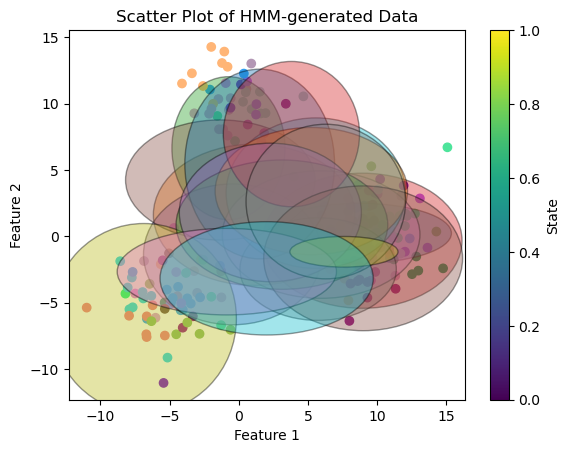

In [29]:
plot_hmm_data(loaded_data, hdp_hmm.Z, hdp_hmm.K, hdp_hmm.mu, hdp_hmm.sigma)
# hdp_hmm.gibbs_sweep()

fitting using gibbs sampling


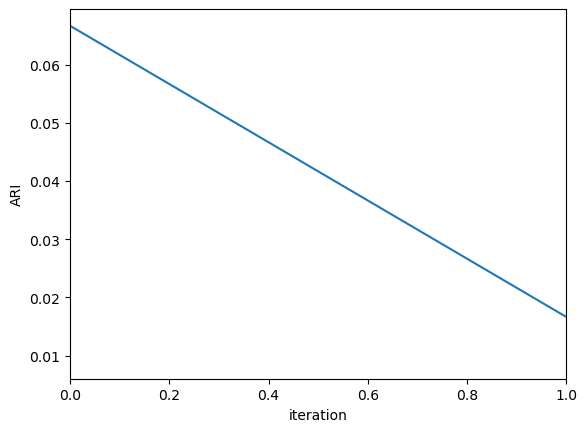

average time for one gibbs sweep:  0.010682508945465088


In [30]:
hdp_hmm.fit()

plt.plot(range(0,len(hdp_hmm.trace[const.TIME])), hdp_hmm.trace[const.TIME], marker="None")
plt.xlabel('iteration')
plt.ylabel('ARI')
plt.xlim(0,1)
#plt.savefig("./image/ari.png")
plt.show()
plt.close()

print('average time for one gibbs sweep: ', np.mean(hdp_hmm.trace[const.TIME]))


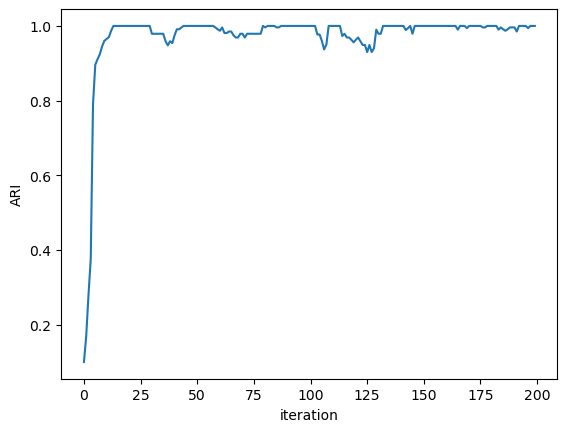

In [31]:
plt.plot(range(0,len(hdp_hmm.ARI)), hdp_hmm.ARI, marker="None")
plt.xlabel('iteration')
plt.ylabel('ARI')
#plt.savefig("./image/ari.png")
plt.show()
plt.close()

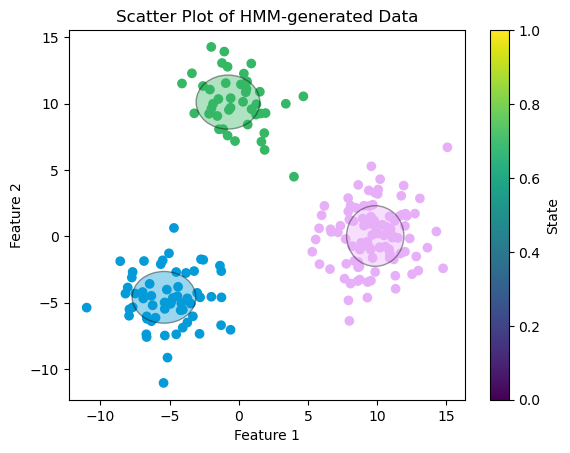

In [33]:
import final.models.hdphmm.helpers.plot_hmm as plot_hmm
reload(plot_hmm)
plot_hmm.plot_hmm_data(loaded_data, hdp_hmm.Z, hdp_hmm.K, hdp_hmm.mu, hdp_hmm.sigma, hdp_hmm.nk, percent=10)